In [35]:
from sktime.datasets import load_airline
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sktime.transformations.series.detrend import Detrender
from sktime.transformations.series.detrend import Deseasonalizer
from sktime.pipeline import make_pipeline

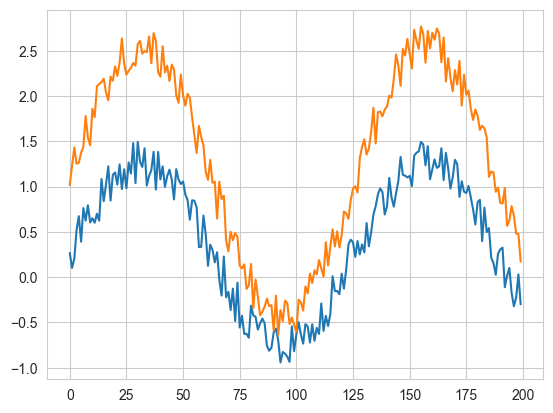

In [8]:
ts1 = pd.Series([np.sin(float(x) / 20.0) + np.random.rand() / 2.0 for x in range(200)])
ts2 = pd.Series(
    [1.5 * np.sin(float(x) / 20.0) + np.random.rand() / 2.0 + 0.8 for x in range(200)]
)
ts1.plot()
ts2.plot()
plt.show()

# Transformations

## Transformation I: Offset Translation

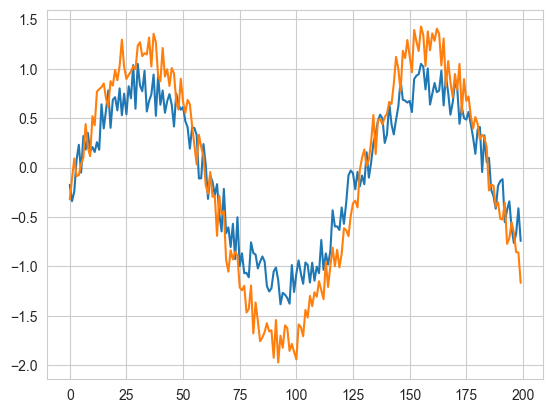

In [9]:
plt.plot(ts1 - ts1.mean())
plt.plot(ts2 - ts2.mean())
plt.show()

In [17]:
scaler = TabularToSeriesAdaptor(StandardScaler(with_std=False))

In [18]:
tss = scaler.fit_transform(pd.DataFrame([ts1, ts2]).T)

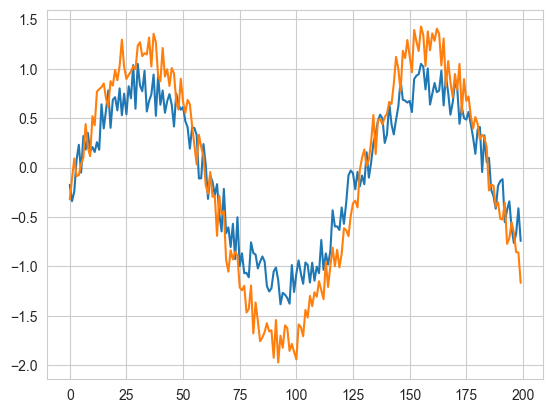

In [19]:
tss[0].plot()
tss[1].plot()
plt.show()

## Transformation II: Amplitude Scaling

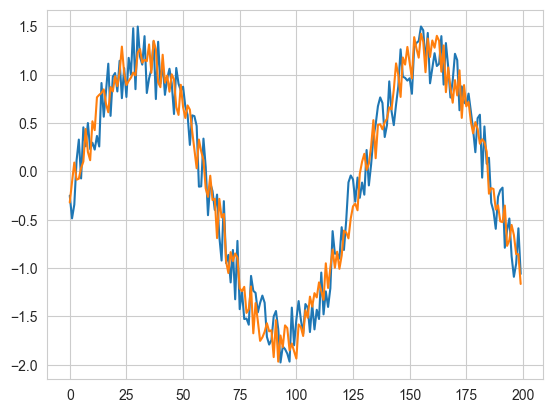

In [10]:
((ts1 - ts1.mean()) / ts1.std()).plot()
((ts2 - ts2.mean()) / ts2.std()).plot()
plt.show()

In [11]:
scaler = TabularToSeriesAdaptor(StandardScaler())

In [15]:
tss = scaler.fit_transform(pd.DataFrame([ts1, ts2]).T)

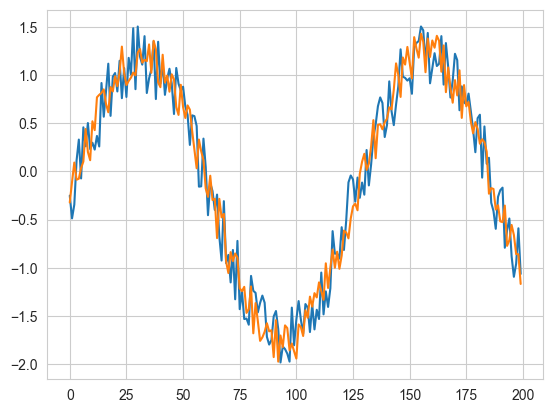

In [16]:
tss[0].plot()
tss[1].plot()
plt.show()

## Transformation III: Noise (smoothing)

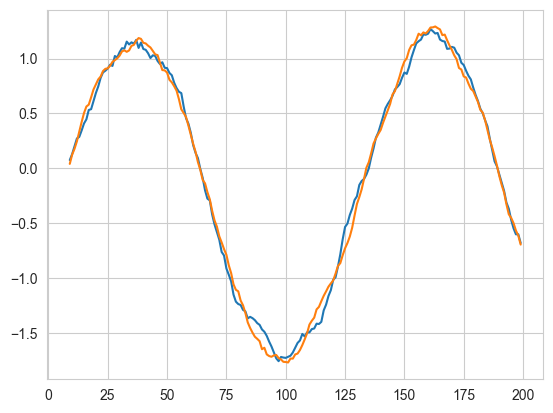

In [46]:
w = 10
(((tss[0] - tss[0].mean()) / tss[0].std()).rolling(window=w).mean()).plot()
(((tss[1] - tss[1].mean()) / tss[1].std()).rolling(window=w).mean()).plot()
plt.show()

## Transformation IV: Trend removal

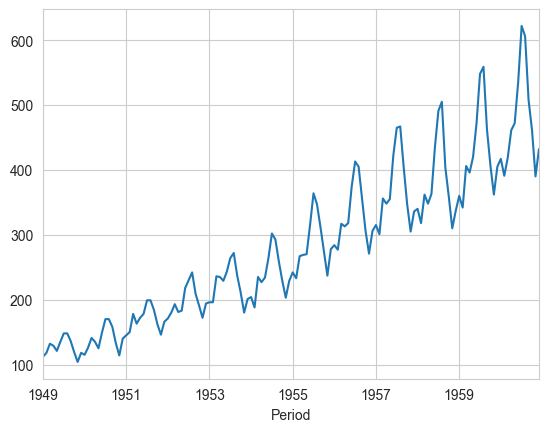

In [23]:
ts = load_airline()
ts.plot()
plt.show()

In [26]:
detrender = Detrender()

In [27]:
ts_detrended = detrender.fit_transform(ts)

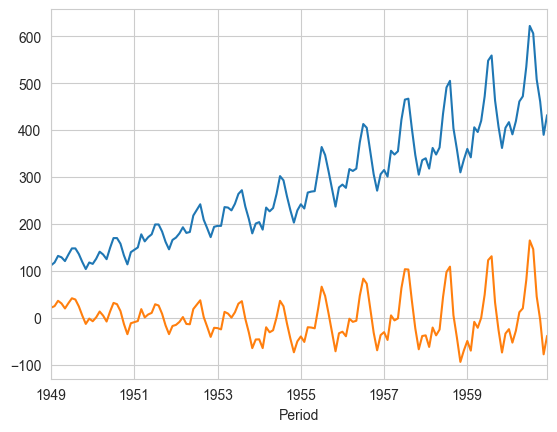

In [28]:
ts.plot()
ts_detrended.plot()
plt.show()